In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv("airlines_flights_data.csv")
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [49]:
df.shape

(300153, 12)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [51]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [52]:
# Data Cleaning

df = df.drop(columns = 'index')

In [59]:
categorical_columns = ["airline", "stops", "departure_time", "stops", "class"]
def value_counts(columns):
    for cols in columns:
        print(f"Value counts of {cols}")
        print(df[cols].value_counts())

value_counts(categorical_columns)

Value counts of airline
airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
Value counts of stops
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64
Value counts of departure_time
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64
Value counts of stops
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64
Value counts of class
class
Economy     206666
Business     93487
Name: count, dtype: int64


In [60]:
# Flights with most and least duration point
df[df["duration"] ==49.830000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


In [74]:
df[df["duration"] ==0.830000].head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
115869,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,6,3498
115943,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,7,3498
116010,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,8,3498
116081,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,9,3498
116163,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,10,3498


In [72]:
columns = df.columns
def value_counts(columns):
    for cols in columns:
        print(f"There are total {df[cols].isnull().sum()} Null values in {cols} column")

value_counts(columns)

There are total 0 Null values in airline column
There are total 0 Null values in flight column
There are total 0 Null values in source_city column
There are total 0 Null values in departure_time column
There are total 0 Null values in stops column
There are total 0 Null values in arrival_time column
There are total 0 Null values in destination_city column
There are total 0 Null values in class column
There are total 0 Null values in duration column
There are total 0 Null values in days_left column
There are total 0 Null values in price column


airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

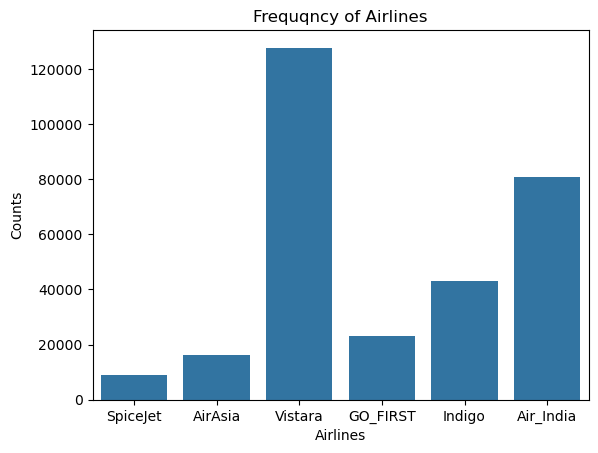

In [90]:
# Q1 What are the ailines in dataset, accompanied with their frequencies
sns.countplot(data = df, x = "airline")
plt.xlabel("Airlines")
plt.ylabel("Counts")
plt.title("Frequqncy of Airlines")
df["airline"].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

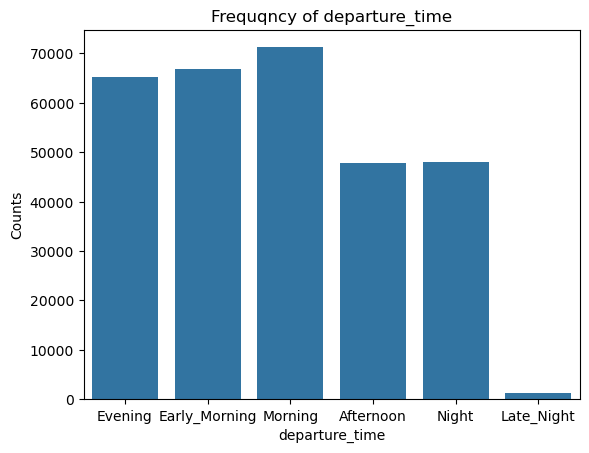

In [98]:
#Q2 show bar graphs representing the departure time and arival time
sns.countplot(data = df, x = "departure_time")
plt.xlabel("departure_time")
plt.ylabel("Counts")
plt.title("Frequqncy of departure_time")
df["departure_time"].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

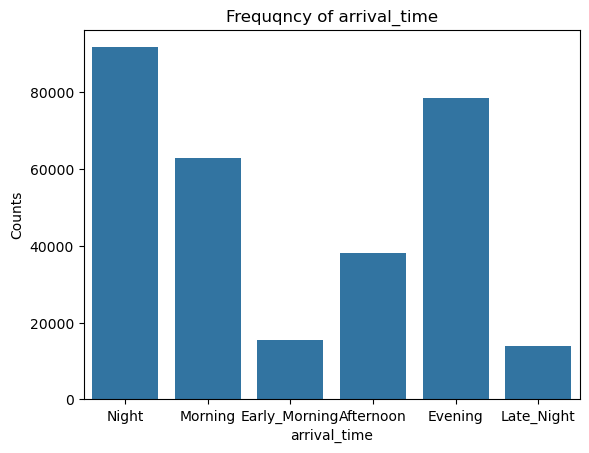

In [100]:
sns.countplot(data = df, x = "arrival_time")
plt.xlabel("arrival_time")
plt.ylabel("Counts")
plt.title("Frequqncy of arrival_time")
df["arrival_time"].value_counts()

<Axes: xlabel='destination_city'>

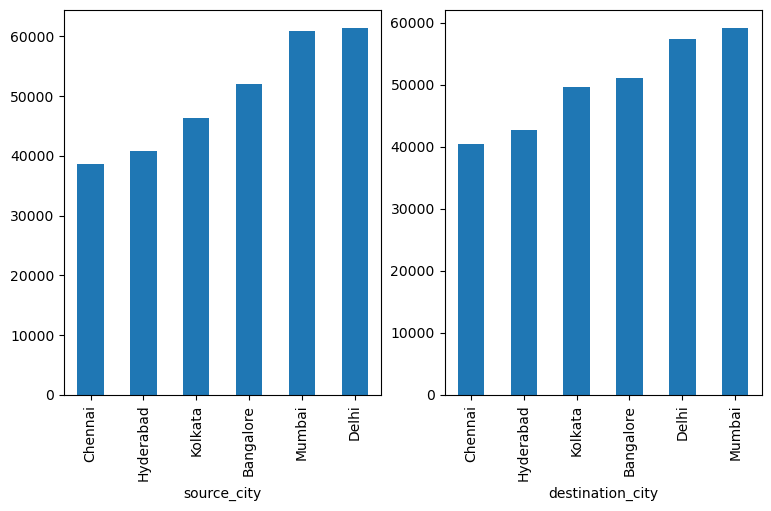

In [132]:
plt.figure(figsize = (9, 5))
plt.subplot(1,2,1)
df["source_city"].value_counts(ascending = True).plot(kind = "bar")
plt.subplot(1,2,2)
df["destination_city"].value_counts(ascending = True).plot(kind = "bar")



airline
AirAsia       4091.0
Indigo        5324.0
GO_FIRST      5652.0
SpiceJet      6179.0
Air_India    23507.0
Vistara      30397.0
Name: price, dtype: float64


<BarContainer object of 6 artists>

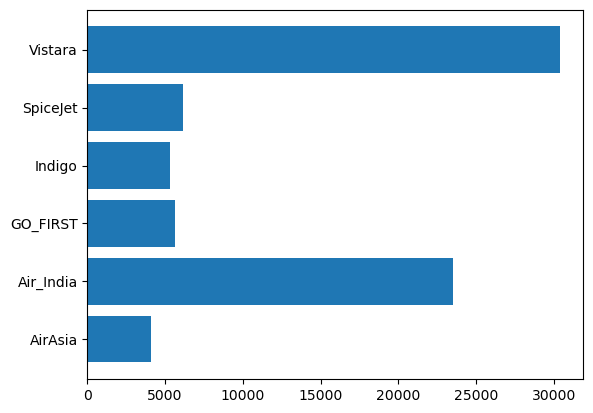

In [169]:
#Q4 Does the price varies with airlines?
print(df.groupby('airline')["price"].mean().round().sort_values(ascending = True))
plt.barh(df.groupby('airline')["price"].mean().round().index.sort_values(ascending = True)
,df.groupby('airline')["price"].mean().round().values
)

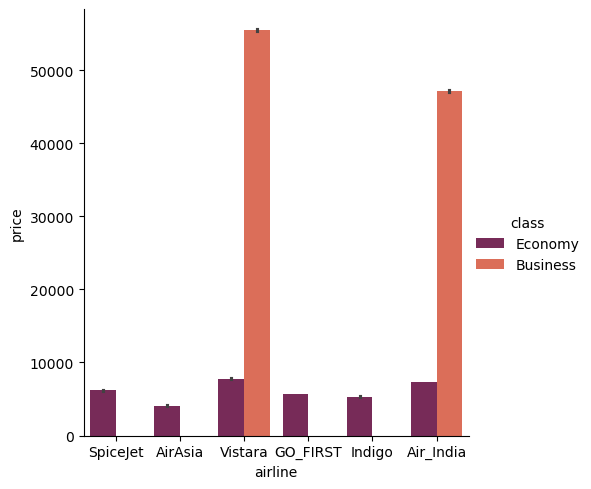

In [175]:
#Option 2
sns.catplot(
    data = df,
    x = 'airline',
    y = 'price',
    kind = 'bar',
    palette = 'rocket',
    hue = 'class'
)
plt.show()

In [181]:
# Q5 Does the ticket prices chage based on the departure and arrival time
df.groupby('departure_time')['price'].mean().round()

departure_time
Afternoon        18179.0
Early_Morning    20371.0
Evening          21232.0
Late_Night        9295.0
Morning          21631.0
Night            23062.0
Name: price, dtype: float64

<Figure size 800x500 with 0 Axes>

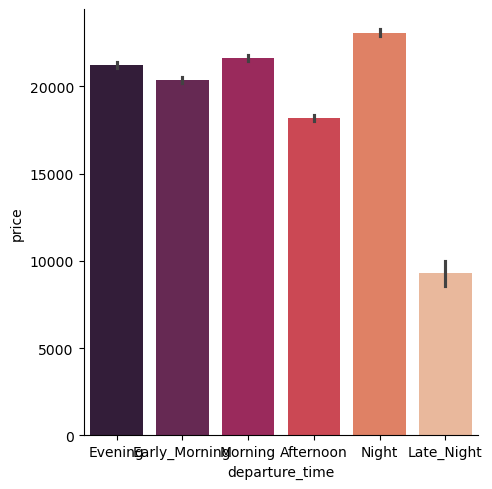

In [193]:
plt.figure(figsize = (8, 5))
sns.catplot(
    data = df,
    x = 'departure_time',
    y = 'price',
    kind = 'bar',
    palette = 'rocket'
)
plt.show()

In [185]:
df.groupby('arrival_time')['price'].mean().round()

arrival_time
Afternoon        18495.0
Early_Morning    14993.0
Evening          23044.0
Late_Night       11285.0
Morning          22231.0
Night            21587.0
Name: price, dtype: float64

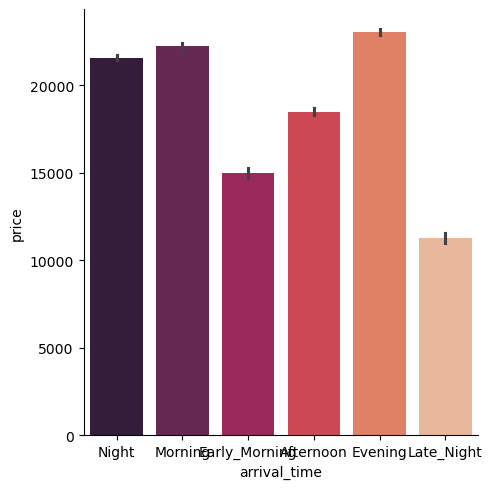

In [187]:
sns.catplot(
    data = df,
    x = 'arrival_time',
    y = 'price',
    kind = 'bar',
    palette = 'rocket'
)
plt.show()

In [197]:
# Q6 Does the ticket prices chage based on the source and destination time
df.groupby('source_city')['price'].mean()

source_city
Bangalore    21469.460575
Chennai      21995.339871
Delhi        18951.326639
Hyderabad    20155.623879
Kolkata      21746.235679
Mumbai       21483.818839
Name: price, dtype: float64

In [199]:
df.groupby('destination_city')['price'].mean()

destination_city
Bangalore    21593.955784
Chennai      21953.323969
Delhi        18436.767870
Hyderabad    20427.661284
Kolkata      21959.557556
Mumbai       21372.529469
Name: price, dtype: float64

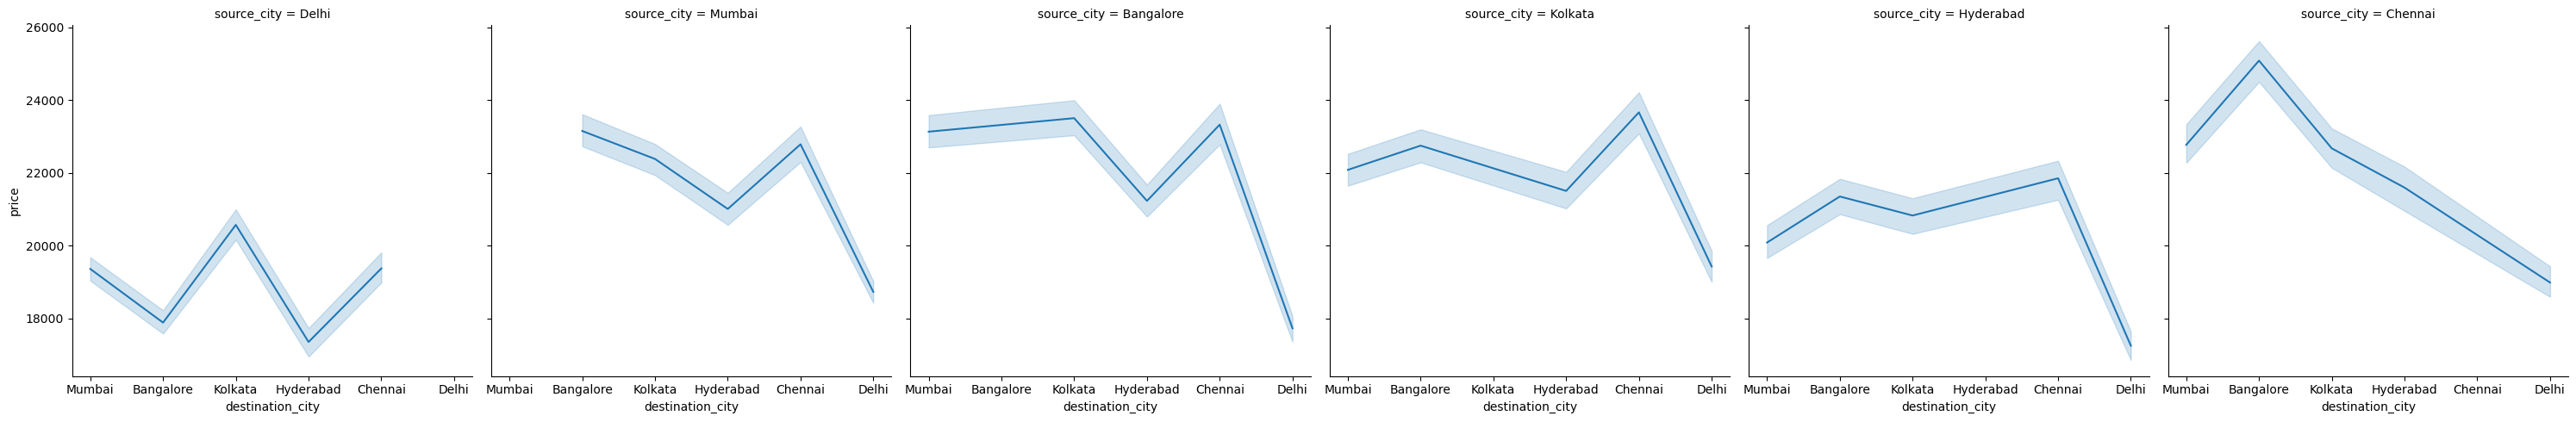

In [201]:
sns.relplot(x = 'destination_city', y = 'price', data = df, col = 'source_city', kind = 'line')

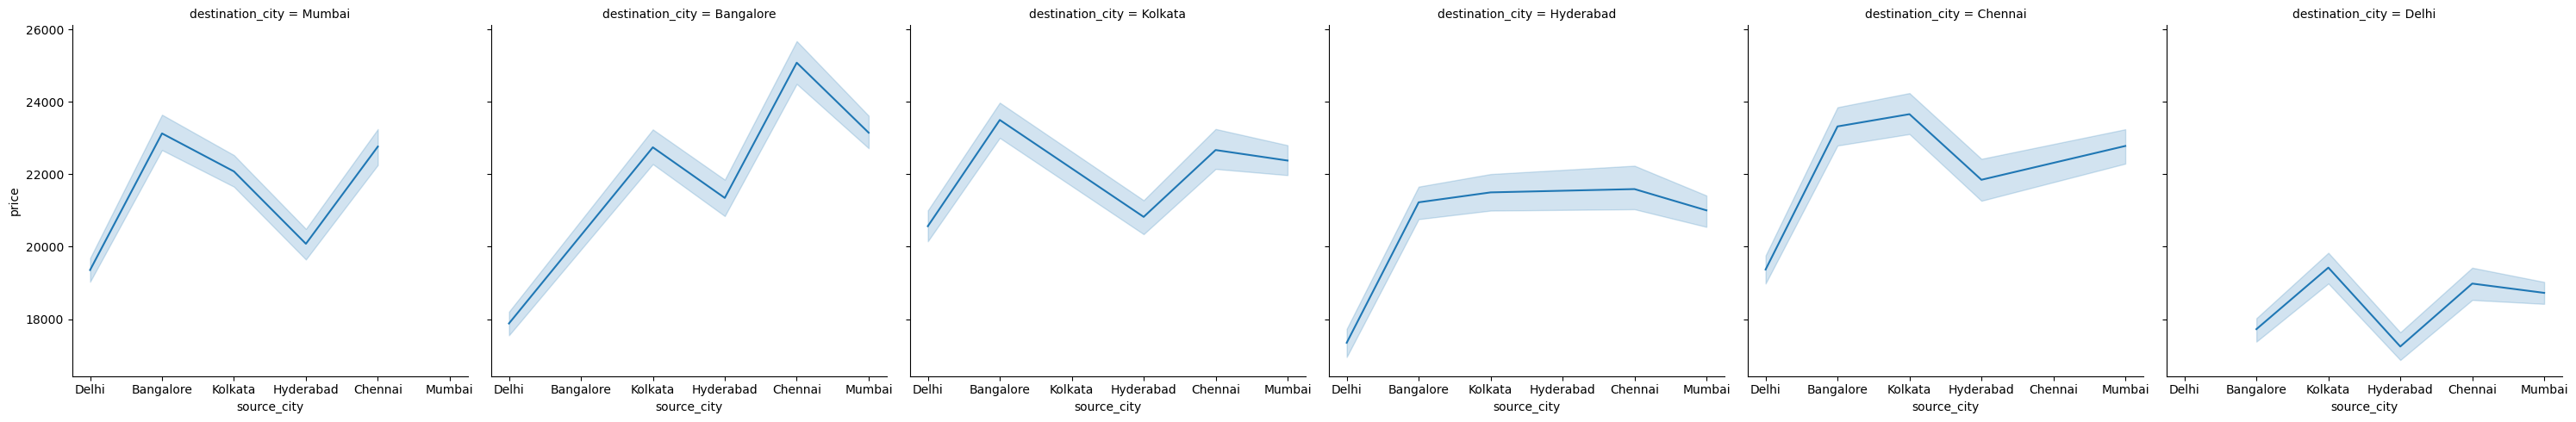

In [203]:
sns.relplot(x = 'source_city', y = 'price', data = df, col = 'destination_city', kind = 'line')